### SUMMER TRAINING NTI
LINEAR REGRESSION 


Mohamed Mahmoud

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns


In [2]:
data =pd.read_csv('home_data.csv')
data

id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180    5650.0     1.0           0     0  ...      7   
1             2570    7242.0     2.0           0     0  ...      7   
2              770   10000.0     1.0           0     0  ...      6   
3             1960    5000.0     1.0           0     0  ...      7   
4             1680    8080.0     1.0           0     0  ...      8   
...            ...       ...     ...         ...   ...  ...    ...   
21608         1530    1131.0     3.0           0     0  ...      8   
21609         2310    5813.0     2.0           0     0  ...      8   
21610         1020    1350.0     2.0           0     0  ...      7   
21611         1600    2388.0     2.0           0     0  ...      8   
21612         1020    1076.0     2.0           0     0  ...      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
0            1180              0      1955             0    98178  47.5112   
1            2170            400      1951          1991    98125  47.7210   
2             770              0      1933             0    98028  47.7379   
3            1050            910      1965             0    98136  47.5208   
4            1680              0      1987             0    98074  47.6168   
...           ...            ...       ...           ...      ...      ...   
21608        1530              0      2009             0    98103  47.6993   
21609        2310              0      2014             0    98146  47.5107   
21610        1020              0      2009             0    98144  47.5944   
21611        1600              0      2004             0    98027  47.5345   
21612        1020              0      2008             0    98144  47.5941   

          long  sqft_living15  sqft_lot15  
0     -122.257           1340        5650  
1     -122.319           1690        7639  
2     -122.233           2720        8062  
3     -122.393           1360        5000  
4     -122.045           1800        7503  
...        ...            ...         ...  
21608 -122.346           1530        1509  
21609 -122.362           1830        7200  
21610 -122.299           1020        2007  
21611 -122.069           1410        1287  
21612 -122.299           1020        1357  

[21613 rows x 21 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  float64
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [30]:
matrix=data.corr()
matrix

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000 -0.016762  0.001286   0.005160    -0.012258 -0.132109   
price         -0.016762  1.000000  0.308350   0.525138     0.702035  0.089661   
bedrooms       0.001286  0.308350  1.000000   0.515884     0.576671  0.031703   
bathrooms      0.005160  0.525138  0.515884   1.000000     0.754665  0.087740   
sqft_living   -0.012258  0.702035  0.576671   0.754665     1.000000  0.172826   
sqft_lot      -0.132109  0.089661  0.031703   0.087740     0.172826  1.000000   
floors         0.018525  0.256794  0.175429   0.500653     0.353949 -0.005201   
waterfront    -0.002721  0.266369 -0.006582   0.063744     0.103818  0.021604   
view           0.011592  0.397293  0.079532   0.187737     0.284611  0.074710   
condition     -0.023783  0.036362  0.028472  -0.124982    -0.058753 -0.008958   
grade          0.008130  0.667434  0.356967   0.664983     0.762704  0.113621   
sqft_above    -0.010842  0.605567  0.477600   0.685342     0.876597  0.183512   
sqft_basement -0.005151  0.323816  0.303093   0.283770     0.435043  0.015286   
yr_built       0.021380  0.054012  0.154178   0.506019     0.318049  0.053080   
yr_renovated  -0.016907  0.126434  0.018841   0.050739     0.055363  0.007644   
zipcode       -0.008224 -0.053203 -0.152668  -0.203866    -0.199430 -0.129574   
lat           -0.001891  0.307003 -0.008931   0.024573     0.052529 -0.085683   
long           0.020799  0.021626  0.129473   0.223042     0.240223  0.229521   
sqft_living15 -0.002901  0.585379  0.391638   0.568634     0.756420  0.144608   
sqft_lot15    -0.138798  0.082447  0.029244   0.087175     0.183286  0.718557   
count_room     0.003488  0.466319  0.895483   0.843260     0.753932  0.065479   

                 floors  waterfront      view  condition  ...  sqft_above  \
id             0.018525   -0.002721  0.011592  -0.023783  ...   -0.010842   
price          0.256794    0.266369  0.397293   0.036362  ...    0.605567   
bedrooms       0.175429   -0.006582  0.079532   0.028472  ...    0.477600   
bathrooms      0.500653    0.063744  0.187737  -0.124982  ...    0.685342   
sqft_living    0.353949    0.103818  0.284611  -0.058753  ...    0.876597   
sqft_lot      -0.005201    0.021604  0.074710  -0.008958  ...    0.183512   
floors         1.000000    0.023698  0.029444  -0.263768  ...    0.523885   
waterfront     0.023698    1.000000  0.401857   0.016653  ...    0.072075   
view           0.029444    0.401857  1.000000   0.045990  ...    0.167649   
condition     -0.263768    0.016653  0.045990   1.000000  ...   -0.158214   
grade          0.458183    0.082775  0.251321  -0.144674  ...    0.755923   
sqft_above     0.523885    0.072075  0.167649  -0.158214  ...    1.000000   
sqft_basement -0.245705    0.080588  0.276947   0.174105  ...   -0.051943   
yr_built       0.489319   -0.026161 -0.053440  -0.361417  ...    0.423898   
yr_renovated   0.006338    0.092885  0.103917  -0.060618  ...    0.023285   
zipcode       -0.059121    0.030285  0.084827   0.003026  ...   -0.261190   
lat            0.049614   -0.014274  0.006157  -0.014941  ...   -0.000816   
long           0.125419   -0.041910 -0.078400  -0.106500  ...    0.343803   
sqft_living15  0.279885    0.086463  0.280439  -0.092824  ...    0.731870   
sqft_lot15    -0.011269    0.030703  0.072575  -0.003406  ...    0.194050   
count_room     0.370197    0.028989  0.147445  -0.047072  ...    0.655752   

               sqft_basement  yr_built  yr_renovated   zipcode       lat  \
id                 -0.005151  0.021380     -0.016907 -0.008224 -0.001891   
price               0.323816  0.054012      0.126434 -0.053203  0.307003   
bedrooms            0.303093  0.154178      0.018841 -0.152668 -0.008931   
bathrooms           0.283770  0.506019      0.050739 -0.203866  0.024573   
sqft_living         0.435043  0.318049      0.055363 -0.199430  0.052529   
sqft_lot            0.015286  0.053080      0.007644 -0.129574 -0.085683   
floors     

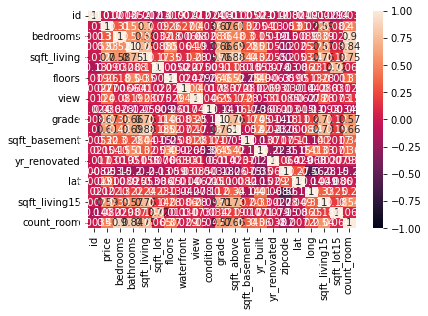

In [35]:
# plt.figure(figsize=(20, 30))
sns.heatmap(matrix, annot=True,vmax=1,vmin=-1)
plt.show()

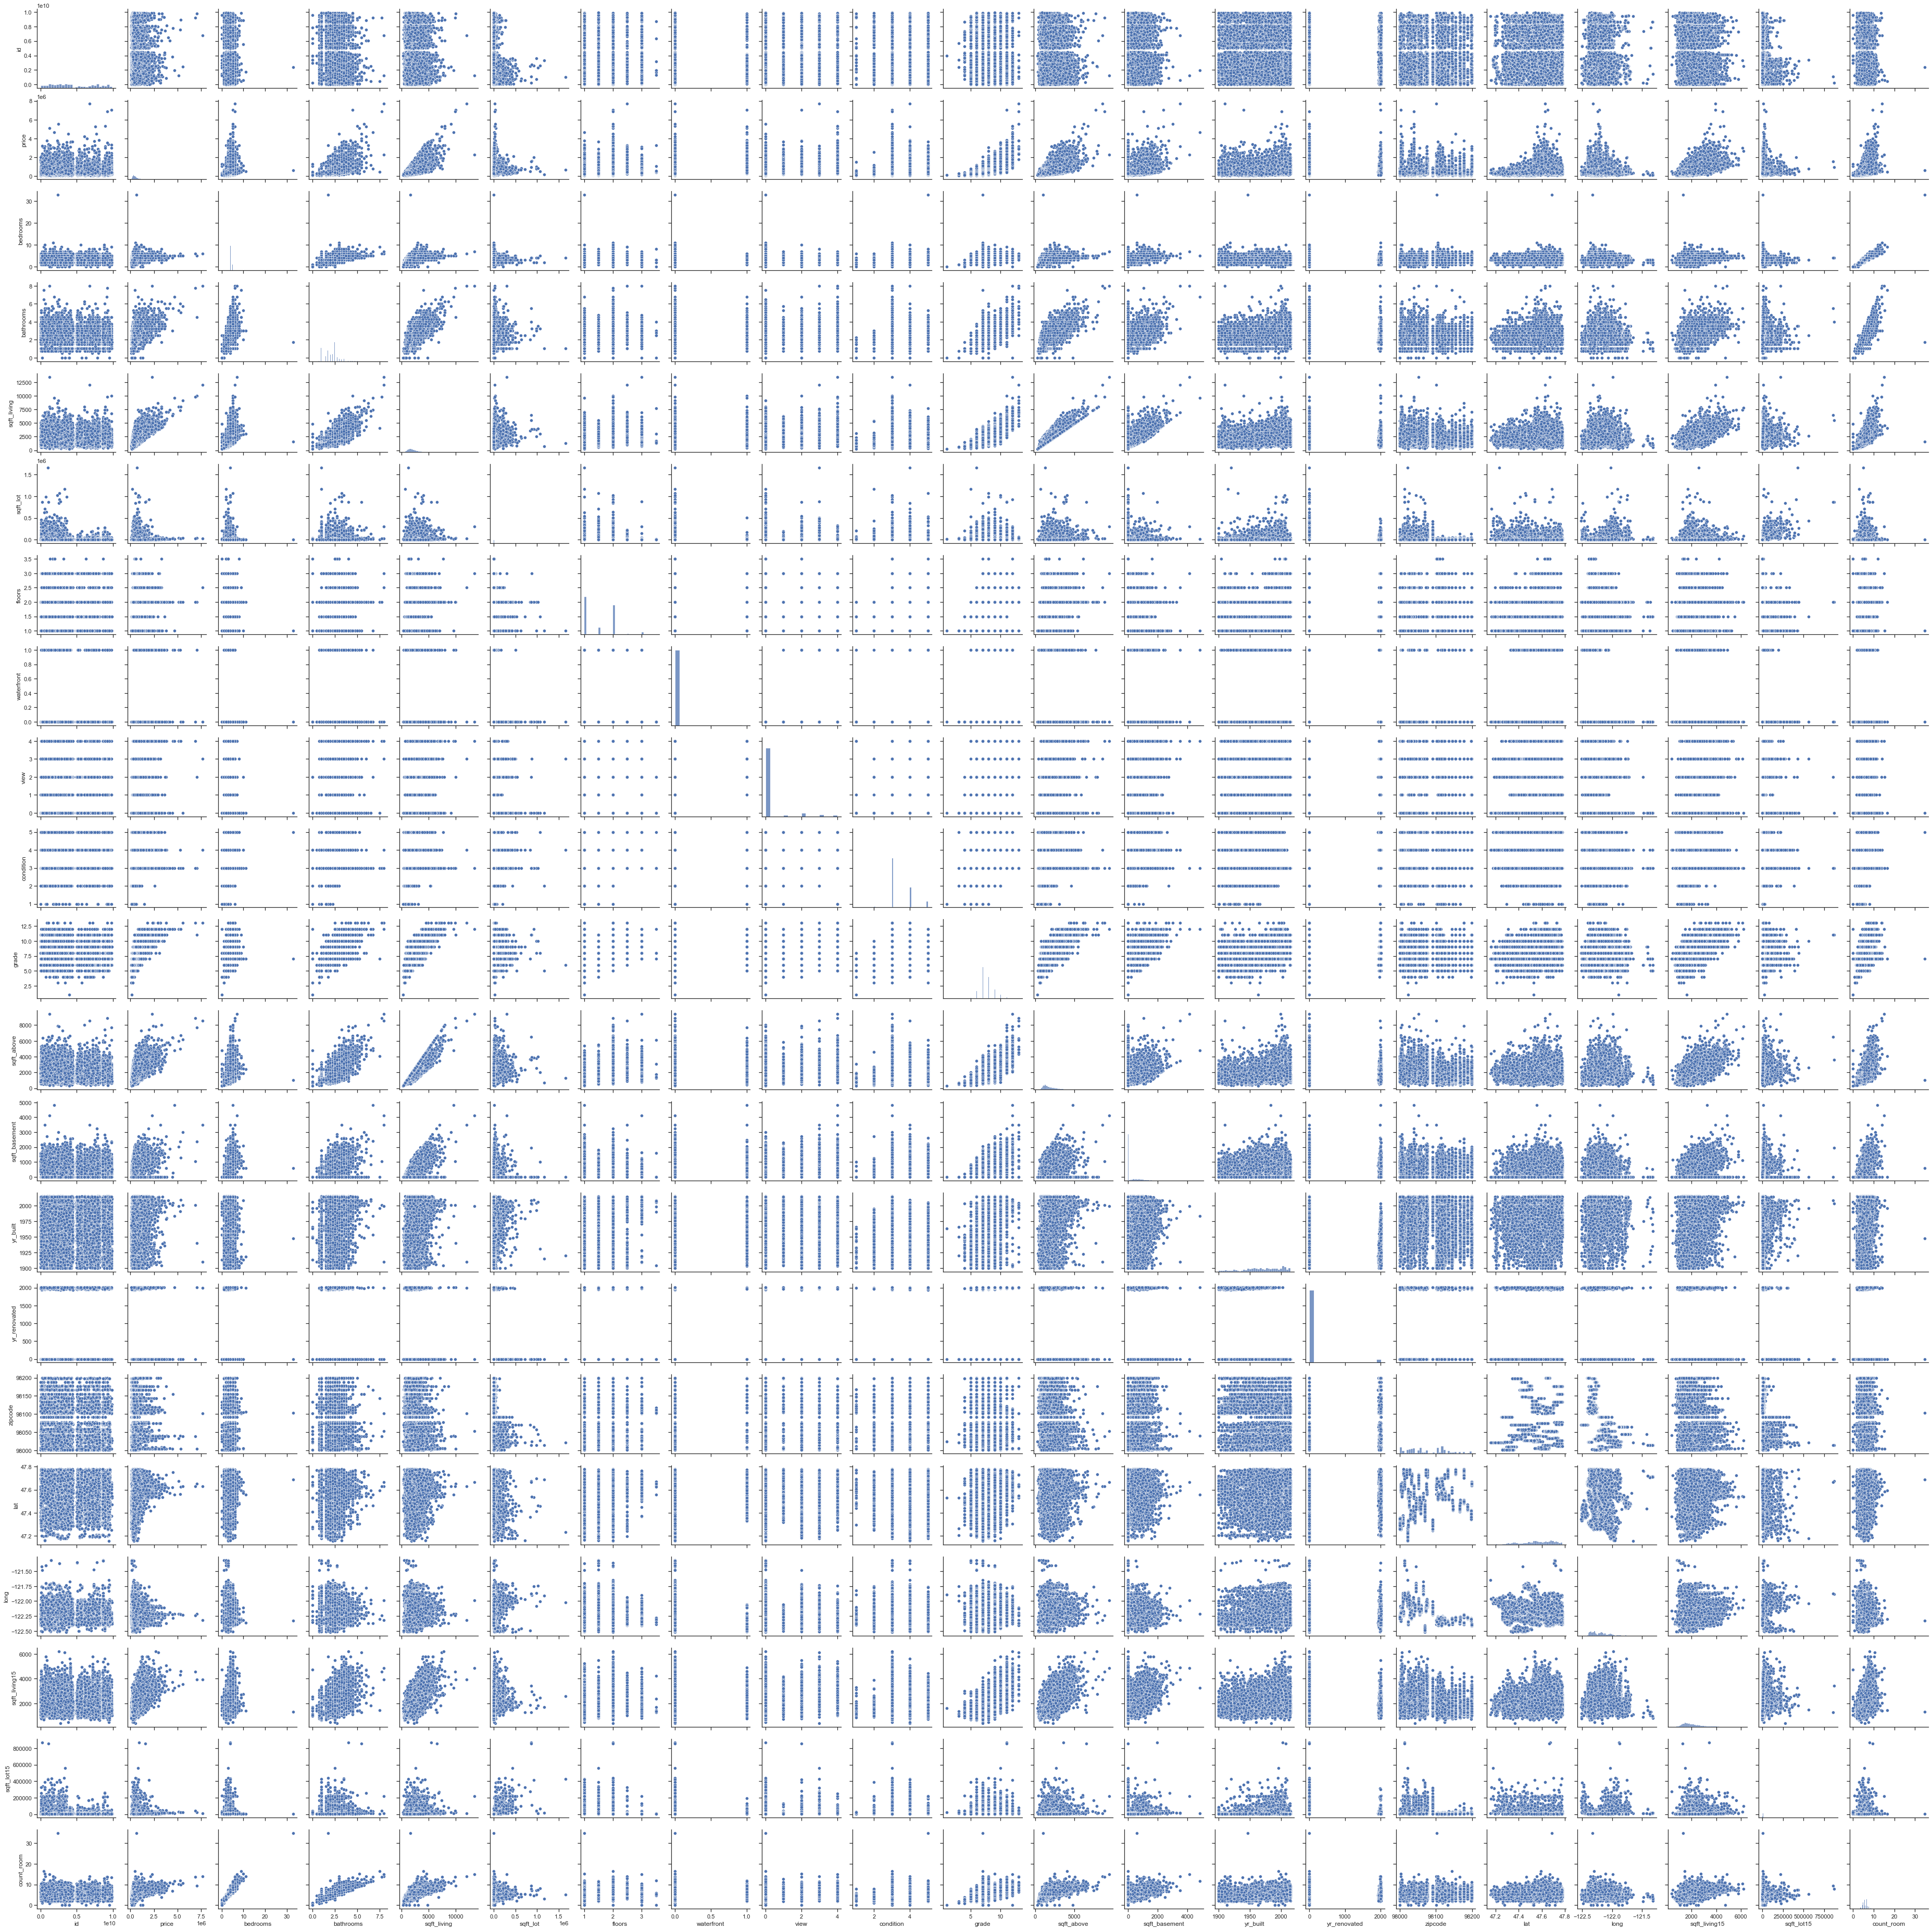

In [37]:
sns.set_theme(style="ticks")
sns.pairplot(data)

In [5]:
data['count_room']=data.bedrooms+data.bathrooms
data.count_room

0        4.00
1        5.25
2        3.00
3        7.00
4        5.00
         ... 
21608    5.50
21609    6.50
21610    2.75
21611    5.50
21612    2.75
Name: count_room, Length: 21613, dtype: float64

In [38]:
x=data.count_room
y=data.price

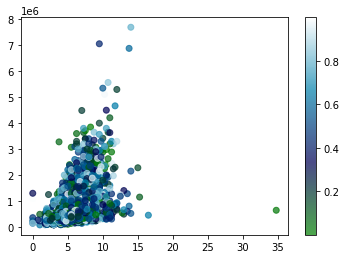

In [7]:
cc=np.random.rand(21613)
scatter=plt.scatter(x,y,c=cc,cmap='ocean',alpha=0.7)
cbar=plt.colorbar(scatter)
plt.show()

In [8]:
stander=StandardScaler()
x=np.array(x)
y=np.array(y)

x = x.reshape(-1, 1)
y = y.reshape(-1, 1)
x=stander.fit_transform(x)
y=stander.fit_transform(y)


In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y ,test_size=0.2,random_state=42)

In [11]:
y_train.shape

(17290, 1)

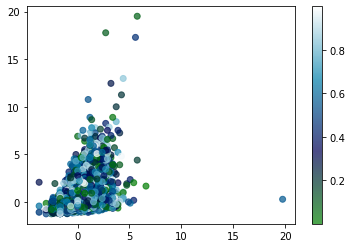

In [12]:
cc=np.random.rand(17290)
scatter=plt.scatter(x_train,y_train,c=cc,cmap='ocean',alpha=0.7)
cbar=plt.colorbar(scatter)
plt.show()

### INITIALIZE 

### model

In [14]:
def model(m,b,x):
    yp=m*x+b
    return yp

### OPTIMIZATIO

In [15]:
def optemizatio(m,b,y,x):
    mnew=(1/n)*sum(((model(m,b,x)-y)**2)*x)
    bnew=(1/n)*sum((model(m,b,x)-y)**2)
    m=m-lr*mnew
    b=b-lr*bnew
    
    return m,b

### ERROR FUNCTION

In [16]:
def crosfunction(m,b,n,x,y):
    error=(1/2*n)*sum((model(m,b,x)-y)**2)
    return error

## ITERATION

In [17]:
def iteration(m,b,it,x,y):
    for i in range(it):
        m,b=optemizatio(m,b,y,x)
        error=crosfunction(m,b,n,x,y)
        print(f'm --> {m}   b --> {b}  error -->{error}')
       
    return m,b,error

In [27]:
m=b=0
lr=0.0001
it=1111
n=len(x_train)
m,b,error=iteration(m,b,it,x_train,y_train)

print('\n',m)


m --> [-0.00011911]   b --> [-9.69414871e-05]  error -->[1.44916589e+08]
m --> [-0.00023823]   b --> [-0.00019389]  error -->[1.4493276e+08]
m --> [-0.00035738]   b --> [-0.00029086]  error -->[1.44948941e+08]
m --> [-0.00047654]   b --> [-0.00038783]  error -->[1.44965131e+08]
m --> [-0.00059573]   b --> [-0.00048482]  error -->[1.4498133e+08]
m --> [-0.00071493]   b --> [-0.00058181]  error -->[1.4499754e+08]
m --> [-0.00083415]   b --> [-0.00067882]  error -->[1.45013759e+08]
m --> [-0.00095339]   b --> [-0.00077583]  error -->[1.45029988e+08]
m --> [-0.00107266]   b --> [-0.00087286]  error -->[1.45046226e+08]
m --> [-0.00119194]   b --> [-0.0009699]  error -->[1.45062474e+08]
m --> [-0.00131124]   b --> [-0.00106695]  error -->[1.45078732e+08]
m --> [-0.00143056]   b --> [-0.00116401]  error -->[1.45095e+08]
m --> [-0.00154989]   b --> [-0.00126108]  error -->[1.45111277e+08]
m --> [-0.00166925]   b --> [-0.00135817]  error -->[1.45127564e+08]
m --> [-0.00178863]   b --> [-0.00145

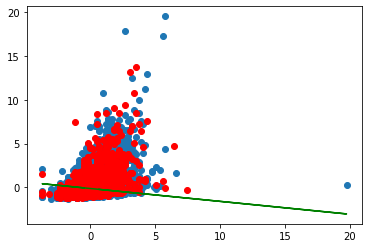

In [28]:
yp=model(m,b,x_train)
scatter=plt.scatter(x_train,y_train)
scatter=plt.scatter(x_test,y_test,color='r')
plt.plot(x_train,yp,'green')
plt.show()